In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Logistic regression

- Introduced by statisticians towards the end of the 60s.
- Hypothesis:
    - Logarithm of conditional probability ratios for an input $x$ is linear to $x$
$$\ln{\Big(\frac{\mathbb{P}(X =x | Y = 1)}{\mathbb{P}(X = x | Y = -1)}\Big)} = w_0 + \langle \bar{w}, x \rangle$$

- A posteriori probability:
$$\mathbb{P}(Y = 1 | X = x) = \frac{1}{1 + e^{-(\tilde{w} + \langle \bar{w}, x \rangle)}}$$

In [16]:
def logistic(x):
    return np.where(x > 0, 
             1 / (1 + np.exp(-x)), 
             np.exp(x) / (1. + np.exp(x)))

Text(0, 0.5, 'log(x)')

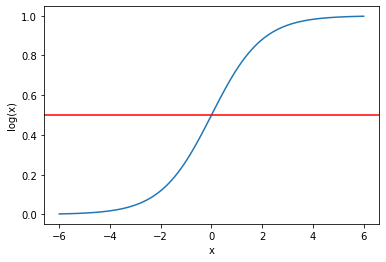

In [18]:
# plotting an example of logistic function
x = np.linspace(-6, 6, 101)
plt.plot(x, logistic(x))
plt.axhline(y=.5, color='red')
plt.xlabel("x")
plt.ylabel("log(x)")

# Logistic loss function

In the case of machine learning it comes down to minimizing an error function. Below is the function we want to minimize in the case of the logistic funcntion.
$$ \hat{\mathcal{L}}(\textbf{w}) = \frac{1}{m}\sum_{t=1}^{m}\ln{(1 + e^{-y_ih_w(x_i)})}$$

In [19]:
def logistic_surrogate_loss(w, X, y):
    # Computing the dot product
    n, d = X.shape
    ps = np.dot(X, w[:-1]) + w[-1]
    yps = y * ps
#     loss = np.where(yps > 0,
#                    np.log(1 + np.exp(-yps)),
#                    (-yps + np.log(1 + np.exp(yps))))
#     loss = logistic(yps)
    loss = np.log(1. + np.exp(-yps))
#     loss = loss.sum()
#     loss /= n
    return np.mean(loss)

## The gradient of the logistic function

$$ \hat{\mathcal{L}}(\textbf{w}) = \frac{1}{m}\sum_{t=1}^{m}\ln{(1 + e^{-y_ih_w(x_i)})}$$

In [20]:
def gradient_log_surrogate_loss(w, X, y):
    # defining dim variables
    n, d = X.shape
    z = X.dot(w[:-1]) + w[-1]
    z = logistic(y*z)
    z0 = (z - 1) * y
    
    # initiating g: gradient vector
    g = np.zeros(d+1)
    # Computing dot product
    g[:-1] = X.T.dot(z0)
    g[-1] = z0.sum()
    g /= n
    return g